In [1]:
# Data visualisation challenge
# https://old.reddit.com/r/dataisbeautiful/comments/8vhxhq/battle_dataviz_battle_for_the_month_of_july_2018/?st=jjx2crac&sh=eeb64989
# Source data: http://archive.is/MaZXl

# Idea: weighted bi-partite network
# Preferred feeder out of scope, but can use same idea as for seeds

In [2]:
#Pkg.add.(["GraphPlot", "Compose", "Colors", "SimpleWeightedGraphs"])
import GraphPlot
import Colors
import SimpleWeightedGraphs

using Compose

In [3]:
# The data.

# In retrospect, a matrix would have been nicer to type into...
birdprefs = Dict(
    "Cardinals" => Dict(
        "Black Oil Sunflower" => "High",
        "Striped Sunflower" => "High",
        "Hulled Sunflower" => "High",
        "Millet White/Red" => "Low",
        "Safflower Seed" => "High",
        "Corn Products" => "Low",
    ),
    "Chickadees" => Dict(
        "Black Oil Sunflower" => "High",
        "Striped Sunflower" => "Medium",
        "Hulled Sunflower" => "Medium",
        "Millet White/Red" => "None",
        "Shelled Peanuts" => "Medium",
        "Safflower Seed" => "Medium",
        "Corn Products" => "None",
    ),
    "Doves" => Dict(
        "Black Oil Sunflower" => "Medium",
        "Striped Sunflower" => "Low",
        "Hulled Sunflower" => "Medium",
        "Millet White/Red" => "High",
        "Milo Seed" => "High",
        "Nyjer Seed (Thistle)" => "Low",
        "Shelled Peanuts" => "None",
        "Safflower Seed" => "Medium",
        "Corn Products" => "Medium",
    ),
   "Goldfinches" => Dict(
        "Black Oil Sunflower" => "High",
        "Striped Sunflower" => "Medium",
        "Hulled Sunflower" => "High",
        "Millet White/Red" => "Low",
        "Milo Seed" => "None",
        "Nyjer Seed (Thistle)" => "High",
        "Shelled Peanuts" => "None",
        "Safflower Seed" => "None",
        "Corn Products" => "None",
    ),
   "Grosbeaks" => Dict(
        "Black Oil Sunflower" => "Medium",
        "Striped Sunflower" => "Medium",
        "Hulled Sunflower" => "High",
        "Millet White/Red" => "None",
        "Milo Seed" => "None",
        "Nyjer Seed (Thistle)" => "None",
        "Shelled Peanuts" => "None",
        "Safflower Seed" => "Low",
        "Corn Products" => "None",
    ),
   "House Finches" => Dict(
        "Black Oil Sunflower" => "High",
        "Striped Sunflower" => "Medium",
        "Hulled Sunflower" => "High",
        "Millet White/Red" => "Medium",
        "Milo Seed" => "None",
        "Nyjer Seed (Thistle)" => "High",
        "Shelled Peanuts" => "None",
        "Safflower Seed" => "Low",
        "Corn Products" => "None",
    ),
   "Jays" => Dict(
        "Black Oil Sunflower" => "High",
        "Striped Sunflower" => "High",
        "Hulled Sunflower" => "High",
        "Millet White/Red" => "None",
        "Milo Seed" => "Low",
        "Nyjer Seed (Thistle)" => "None",
        "Shelled Peanuts" => "Medium",
        "Safflower Seed" => "Low",
        "Corn Products" => "Medium",
    ),
   "Juncos" => Dict(
        "Black Oil Sunflower" => "Low",
        "Striped Sunflower" => "Low",
        "Hulled Sunflower" => "Low",
        "Millet White/Red" => "Low",
        "Milo Seed" => "None",
        "Nyjer Seed (Thistle)" => "Low",
        "Shelled Peanuts" => "None",
        "Safflower Seed" => "None",
        "Corn Products" => "High",
    ),
   "Nunthatches" => Dict(
        "Black Oil Sunflower" => "High",
        "Striped Sunflower" => "Medium",
        "Hulled Sunflower" => "Medium",
        "Millet White/Red" => "None",
        "Milo Seed" => "None",
        "Nyjer Seed (Thistle)" => "None",
        "Shelled Peanuts" => "Low",
        "Safflower Seed" => "Low",
        "Corn Products" => "None",
    ),
   "Purple Finches" => Dict(
        "Black Oil Sunflower" => "High",
        "Striped Sunflower" => "Medium",
        "Hulled Sunflower" => "High",
        "Millet White/Red" => "Low",
        "Milo Seed" => "None",
        "Nyjer Seed (Thistle)" => "High",
        "Shelled Peanuts" => "None",
        "Safflower Seed" => "None",
        "Corn Products" => "None",
    ),
   "Siskins" => Dict(
        "Black Oil Sunflower" => "Low",
        "Striped Sunflower" => "Low",
        "Hulled Sunflower" => "High",
        "Millet White/Red" => "None",
        "Milo Seed" => "None",
        "Nyjer Seed (Thistle)" => "High",
        "Shelled Peanuts" => "None",
        "Safflower Seed" => "None",
        "Corn Products" => "Low",
    ),
   "Sparrows" => Dict(
        "Black Oil Sunflower" => "High",
        "Striped Sunflower" => "High",
        "Hulled Sunflower" => "High",
        "Millet White/Red" => "High",
        "Milo Seed" => "Medium",
        "Nyjer Seed (Thistle)" => "None",
        "Shelled Peanuts" => "None",
        "Safflower Seed" => "Low",
        "Corn Products" => "Medium",
    ),
   "Titmice" => Dict(
        "Black Oil Sunflower" => "High",
        "Striped Sunflower" => "Medium",
        "Hulled Sunflower" => "Medium",
        "Millet White/Red" => "None",
        "Milo Seed" => "None",
        "Nyjer Seed (Thistle)" => "Low",
        "Shelled Peanuts" => "Medium",
        "Safflower Seed" => "Low",
        "Corn Products" => "None",
    ),
   "Towhees" => Dict(
        "Black Oil Sunflower" => "High",
        "Striped Sunflower" => "High",
        "Hulled Sunflower" => "High",
        "Millet White/Red" => "Low",
        "Milo Seed" => "None",
        "Nyjer Seed (Thistle)" => "None",
        "Shelled Peanuts" => "Low",
        "Safflower Seed" => "Low",
        "Corn Products" => "Low",
    ),
   "Woodpeckers" => Dict(
        "Black Oil Sunflower" => "Medium",
        "Striped Sunflower" => "Medium",
        "Hulled Sunflower" => "High",
        "Millet White/Red" => "None",
        "Milo Seed" => "None",
        "Nyjer Seed (Thistle)" => "None",
        "Shelled Peanuts" => "Low",
        "Safflower Seed" => "Low",
        "Corn Products" => "Low",
    ),
)

feedprefs = Dict(
    "Cardinals" => "abde",
    "Chickadees" => "acdf",
    "Doves" => "de",
    "Goldfinches" => "ac",
    "Grosbeaks" => "ad",
    "House Finches" => "ac",
    "Jays" => "ade",
    "Juncos" => "ade",
    "Nunthatches" => "abf",
    "Purple Finches" => "ac",
    "Siskins" => "bc",
    "Sparrows" => "abd",
    "Titmice" => "abdf",
    "Towhees" => "ade",
    "Woodpeckes" => "adf",
)

Dict{String,String} with 15 entries:
  "Juncos"         => "ade"
  "Cardinals"      => "abde"
  "Jays"           => "ade"
  "Grosbeaks"      => "ad"
  "Siskins"        => "bc"
  "Nunthatches"    => "abf"
  "Goldfinches"    => "ac"
  "Doves"          => "de"
  "Sparrows"       => "abd"
  "Woodpeckes"     => "adf"
  "Towhees"        => "ade"
  "Titmice"        => "abdf"
  "House Finches"  => "ac"
  "Purple Finches" => "ac"
  "Chickadees"     => "acdf"

In [4]:
# Get all of the names of the seeds, birds and feeders from the data

feeders = split("abcdef","")
birds = unique(vcat(collect(keys(birdprefs))...))

# The strange "." after the function names is called "broadcasting" in Julia
# It means "apply this function to the array elementwise"
seeds = unique(vcat(collect.(keys.(collect(values(birdprefs))))...))

9-element Array{String,1}:
 "Shelled Peanuts"     
 "Milo Seed"           
 "Safflower Seed"      
 "Striped Sunflower"   
 "Black Oil Sunflower" 
 "Hulled Sunflower"    
 "Nyjer Seed (Thistle)"
 "Corn Products"       
 "Millet White/Red"    

In [5]:
# Translate function to English to save my sanity
zeroes = zeros # Soundtrack for this line: https://www.youtube.com/watch?v=-XfbEOFLqPE

zeros (generic function with 15 methods)

In [6]:
# Parse the data dicts to make the bipartite adjacency matrices

# The bird <-> food preferences
bipmat = zeroes(Int64,length(seeds),length(birds))
for (column,bird) in enumerate(birds)
    for (row,seed) in enumerate(seeds)
        bipmat[row,column] = (x -> x == "High" ? 3 :
            x == "Medium" ? 2 :
            x == "Low" ? 1 :
            x == "None" ? 0 : -1)(get(get(birdprefs,bird,"Dodo"),seed,"None"))
    end
end

# The bird <-> feeder preferences (unused)
bipmat_feeder = zeroes(Int64,length(feeders),length(birds))
for (column,bird) in enumerate(birds)
    for (row,seed) in enumerate(feeders)
        bipmat_feeder[row,column] = findfirst(s->s==seed,split(bird,""))
    end
end

# Helper functions for translating between row/column numbers and their labels
bird2col = Dict( n => i for (i,n) in enumerate(birds))
seed2row = Dict( n => i for (i,n) in enumerate(seeds))
feed2row = Dict( n => i for (i,n) in enumerate(feeders))


feedlabel2name = l -> Dict(
    "a" => "Hopper Feeder",
    "b" => "Tube Feeder",
    "c" => "Nyjer Feeder",
    "d" => "Platform Feeder",
    "e" => "Ground Feeder",
    "f" => "Suet Feeder",
)[l]

(::#13) (generic function with 1 method)

In [7]:
# Convert a bipartite matrix into a "unipartite" adjacency matrix
bi2uni = bipmat -> [
    zeroes(
        Int64,
        size(bipmat)[1],
        size(bipmat)[1]
    ) bipmat;
    bipmat' zeroes(
        Int64,size(bipmat')[1],size(bipmat')[1]
    )
] 

# Set colours up for use in GraphPlot
(seedc,birdc) = (Colors.HSL(200,100,0.02), Colors.HSL(300,100,0.02))
colours = [repmat([seedc],length(seeds))..., repmat([birdc],length(birds))...];

In [8]:
# sprint_layout taken from GraphPlot, modified to use edge weights as force multipliers
# It simulates the network as if it was linked together with springs and waits for an equilibrium
function spring_layout(adj,pow=2)
    g = SimpleWeightedGraphs.SimpleWeightedGraph(adj)
    return function spring_layout(G, locs_x=2*rand(LightGraphs.nv(G)).-1.0, locs_y=2*rand(LightGraphs.nv(G)).-1.0; C=2.0, MAXITER=100, INITTEMP=2.0)

        #size(adj_matrix, 1) != size(adj_matrix, 2) && error("Adj. matrix must be square.")
        const N = LightGraphs.nv(G)
        adj_matrix = LightGraphs.adjacency_matrix(G)
        weight_matrix = SimpleWeightedGraphs.weights(g)

        # The optimal distance bewteen vertices
        const K = C * sqrt(4.0 / N)

        # Store forces and apply at end of iteration all at once
        force_x = zeros(N)
        force_y = zeros(N)

        # Iterate MAXITER times
        @inbounds for iter = 1:MAXITER
            # Calculate forces
            for i = 1:N
                force_vec_x = 0.0
                force_vec_y = 0.0
                for j = 1:N
                    i == j && continue
                    d_x = locs_x[j] - locs_x[i]
                    d_y = locs_y[j] - locs_y[i]
                    d   = sqrt(d_x^2 + d_y^2)
                    if adj_matrix[i,j] != zero(eltype(adj_matrix)) || adj_matrix[j,i] != zero(eltype(adj_matrix))
                        # F = d^2 / K - K^2 / d
                        F_d = weight_matrix[i,j]^pow * d / K - K^2 / d^2
                    else
                        # Just repulsive
                        # F = -K^2 / d^
                        F_d = -K^2 / d^2
                    end
                    # d  /          sin θ = d_y/d = fy/F
                    # F /| dy fy    -> fy = F*d_y/d
                    #  / |          cos θ = d_x/d = fx/F
                    # /---          -> fx = F*d_x/d
                    # dx fx
                    force_vec_x += F_d*d_x
                    force_vec_y += F_d*d_y
                end
                force_x[i] = force_vec_x
                force_y[i] = force_vec_y
            end
            # Cool down
            TEMP = INITTEMP / iter
            # Now apply them, but limit to temperature
            for i = 1:N
                force_mag  = sqrt(force_x[i]^2 + force_y[i]^2)
                scale      = min(force_mag, TEMP)/force_mag
                locs_x[i] += force_x[i] * scale
                #locs_x[i]  = max(-1.0, min(locs_x[i], +1.0))
                locs_y[i] += force_y[i] * scale
                #locs_y[i]  = max(-1.0, min(locs_y[i], +1.0))
            end
        end

        # Scale to unit square
        min_x, max_x = minimum(locs_x), maximum(locs_x)
        min_y, max_y = minimum(locs_y), maximum(locs_y)
        function scaler(z, a, b)
            2.0*((z - a)/(b - a)) - 1.0
        end
        map!(z -> scaler(z, min_x, max_x), locs_x, locs_x)
        map!(z -> scaler(z, min_y, max_y), locs_y, locs_y)

        return locs_x,locs_y
    end
end

spring_layout (generic function with 2 methods)

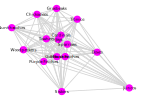

In [9]:
# Helper function for plotting
function lazyplot(adj;strength=1,labels=[],colours=[])
    g = LightGraphs.Graph(adj)
    GraphPlot.gplot(
        LightGraphs.Graph(adj),
        nodelabel=labels,
        nodefillc=colours,
        layout=spring_layout(adj,strength),
    )
end

# Plotting the birds

# bipmat' * bipmat is a one-mode projection of the bipartite matrix

# It adds up all of the co-incidences where birds like the same food
# and uses that as the edge weight

plot = lazyplot(bipmat'*bipmat,labels=birds,colours=birdc,strength=3)

In [10]:
# I edited the PDFs in InkScape to sort out the overlapping labels

# I really wish something could do that automatically!

#draw(PDF("birds/Birds.pdf",16cm,16cm), plot)

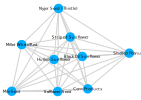

In [11]:
# Plotting the seeds

# bipmat * bipmat' is the other one-mode projection,
# relating to seeds which are desired by the same birds

plot = lazyplot(bipmat*bipmat',labels=seeds,colours=seedc)

In [12]:
#draw(PDF("birds/Seeds.pdf",16cm,16cm), plot)

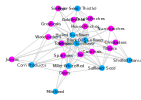

In [13]:
# The whole bipartite graph plotted together

plot = lazyplot(bi2uni(bipmat);labels=vcat(seeds,birds),colours=colours,strength=3)

In [14]:
#draw(PDF("birds/SeedsAndBirds.pdf",16cm,16cm), plot)